In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/occupancy/'

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
occupancy_all = pd.read_csv(f'{PATH}occ_20180902.csv', low_memory=False)

In [4]:
from IPython.display import HTML, display

In [5]:
display(occupancy_all.head())

,facility_id,zone_id,article_id,date_slice,time_slice,city,city_type,facility_purpose,facility_type,article_category,occupancy
0,500140,0,1,2018-03-02,00:15:00,Oosterhout,ACities,Multifunction,Combination,STP,0
1,500140,0,1,2018-03-02,00:30:00,Oosterhout,ACities,Multifunction,Combination,STP,0
2,500140,0,1,2018-03-02,00:45:00,Oosterhout,ACities,Multifunction,Combination,STP,0
3,500140,0,1,2018-03-02,01:00:00,Oosterhout,ACities,Multifunction,Combination,STP,0
4,500140,0,1,2018-03-02,01:15:00,Oosterhout,ACities,Multifunction,Combination,STP,0


In [6]:
display(DataFrameSummary(occupancy_all).summary())

,facility_id,zone_id,article_id,date_slice,time_slice,city,city_type,facility_purpose,facility_type,article_category,occupancy
count,1.57234e+07,1.57234e+07,1.57234e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.57234e+07
mean,502868,0.220112,1891.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.82316
std,2114.05,0.546843,3500.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0248
min,500140,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25%,501353,0,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
50%,502260,0,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
75%,504183,0,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
max,510842,3,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1330
counts,15723360,15723360,15723360,15723360,15723360,15723360,15723360,15723360,15723360,15723360,15723360
uniques,110,4,68,184,96,58,1,2,5,3,1066


In [7]:
# sorted = occupancy_all.drop(columns=["country", "pms"]).sort_values(by=["parkingFacilityId", "parkingFacilityZoneId", "articleId", "timeInMillis"])

# remove zone
occupancy = occupancy_all.groupby(['facility_id', 'article_id', 'date_slice', 'time_slice',
       'city', 'city_type', 'facility_purpose', 'facility_type',
       'article_category'])['occupancy'].sum().reset_index()

In [8]:
display(occupancy.head())

,facility_id,article_id,date_slice,time_slice,city,city_type,facility_purpose,facility_type,article_category,occupancy
0,500140,1,2018-03-02,00:15:00,Oosterhout,ACities,Multifunction,Combination,STP,0
1,500140,1,2018-03-02,00:30:00,Oosterhout,ACities,Multifunction,Combination,STP,0
2,500140,1,2018-03-02,00:45:00,Oosterhout,ACities,Multifunction,Combination,STP,0
3,500140,1,2018-03-02,01:00:00,Oosterhout,ACities,Multifunction,Combination,STP,0
4,500140,1,2018-03-02,01:15:00,Oosterhout,ACities,Multifunction,Combination,STP,0


In [9]:
# add 1 to occupancy, so we can take the log
occupancy['occupancy'] += 1

In [10]:
add_datepart(occupancy, "date_slice", drop=False)


In [11]:
display(occupancy.head())

,facility_id,article_id,date_slice,time_slice,city,city_type,facility_purpose,facility_type,article_category,occupancy,...,date_sliceDay,date_sliceDayofweek,date_sliceDayofyear,date_sliceIs_month_end,date_sliceIs_month_start,date_sliceIs_quarter_end,date_sliceIs_quarter_start,date_sliceIs_year_end,date_sliceIs_year_start,date_sliceElapsed
0,500140,1,2018-03-02,00:15:00,Oosterhout,ACities,Multifunction,Combination,STP,1,...,2,4,61,False,False,False,False,False,False,1519948800
1,500140,1,2018-03-02,00:30:00,Oosterhout,ACities,Multifunction,Combination,STP,1,...,2,4,61,False,False,False,False,False,False,1519948800
2,500140,1,2018-03-02,00:45:00,Oosterhout,ACities,Multifunction,Combination,STP,1,...,2,4,61,False,False,False,False,False,False,1519948800
3,500140,1,2018-03-02,01:00:00,Oosterhout,ACities,Multifunction,Combination,STP,1,...,2,4,61,False,False,False,False,False,False,1519948800
4,500140,1,2018-03-02,01:15:00,Oosterhout,ACities,Multifunction,Combination,STP,1,...,2,4,61,False,False,False,False,False,False,1519948800


In [12]:
occupancy.columns

Index(['facility_id', 'article_id', 'date_slice', 'time_slice', 'city',
       'city_type', 'facility_purpose', 'facility_type', 'article_category',
       'occupancy', 'date_sliceYear', 'date_sliceMonth', 'date_sliceWeek',
       'date_sliceDay', 'date_sliceDayofweek', 'date_sliceDayofyear',
       'date_sliceIs_month_end', 'date_sliceIs_month_start',
       'date_sliceIs_quarter_end', 'date_sliceIs_quarter_start',
       'date_sliceIs_year_end', 'date_sliceIs_year_start',
       'date_sliceElapsed'],
      dtype='object')

In [13]:
cat_vars = ['facility_id', 
            'article_id', 
            'time_slice', 
            'city', 
            'city_type', 
            'facility_purpose', 
            'facility_type', 
            'article_category',       
            'date_sliceDayofweek'
        ] 

contin_vars = []
dep = 'occupancy'

In [14]:
occupancy_cat = occupancy[cat_vars+[dep]].copy()

In [15]:
for v in cat_vars: 
    occupancy_cat[v] = occupancy_cat[v].astype('category').cat.as_ordered()


In [16]:
# apply_cats(occupancy_test_cat, occupancy_train_cat)

In [17]:
occupancy_cat.head()

,facility_id,article_id,time_slice,city,city_type,facility_purpose,facility_type,article_category,date_sliceDayofweek,occupancy
0,500140,1,00:15:00,Oosterhout,ACities,Multifunction,Combination,STP,4,1
1,500140,1,00:30:00,Oosterhout,ACities,Multifunction,Combination,STP,4,1
2,500140,1,00:45:00,Oosterhout,ACities,Multifunction,Combination,STP,4,1
3,500140,1,01:00:00,Oosterhout,ACities,Multifunction,Combination,STP,4,1
4,500140,1,01:15:00,Oosterhout,ACities,Multifunction,Combination,STP,4,1


In [18]:
df, y, nas = proc_df(occupancy_cat, 'occupancy', do_scale=False)

In [19]:
df.head()

,facility_id,article_id,time_slice,city,city_type,facility_purpose,facility_type,article_category,date_sliceDayofweek
0,1,1,2,40,1,1,2,3,5
1,1,1,3,40,1,1,2,3,5
2,1,1,4,40,1,1,2,3,5
3,1,1,5,40,1,1,2,3,5
4,1,1,6,40,1,1,2,3,5


In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
yl = np.log(y)
yl

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
min_date = occupancy['date_slice'].min()
max_date = occupancy['date_slice'].max()

# 6 month of data
# take 1 month for test set
break_point = max_date - ((max_date - min_date) / 6) 

val_idx = occupancy.index[occupancy.date_slice > break_point]
len(val_idx)
val_idx

Int64Index([   14687,    14688,    14689,    14690,    14691,    14692,
               14693,    14694,    14695,    14696,
            ...
            12648950, 12648951, 12648952, 12648953, 12648954, 12648955,
            12648956, 12648957, 12648958, 12648959],
           dtype='int64', length=2074320)

In [23]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [24]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=None)

In [25]:
cat_sz = [(c, len(occupancy_cat[c].cat.categories)+1) for c in cat_vars]

In [26]:
cat_sz

[('facility_id', 111),
 ('article_id', 69),
 ('time_slice', 97),
 ('city', 59),
 ('city_type', 2),
 ('facility_purpose', 3),
 ('facility_type', 6),
 ('article_category', 4),
 ('date_sliceDayofweek', 8)]

In [27]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [28]:
emb_szs

[(111, 50),
 (69, 35),
 (97, 49),
 (59, 30),
 (2, 1),
 (3, 2),
 (6, 3),
 (4, 2),
 (8, 4)]

In [29]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 50]),
                           ('trainable', True),
                           ('nb_params', 5550)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 35]),
                           ('trainable', True),
                           ('nb_params', 2415)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 49]),
                           ('trainable', True),
                           ('nb_params', 4753)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 30]),
                           ('trainable', True),
                           ('nb_params', 1770)])),
             ('Embedding-5',
              OrderedDict([('input_shap

In [39]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.05,0.5], y_range=y_range, use_bn=True)

In [40]:
m.lr_find()

 54%|█████▍    | 44791/82615 [03:52<03:16, 192.47it/s, loss=1.02] 

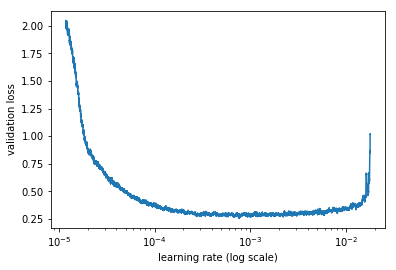

In [46]:
m.sched.plot(1000)

In [47]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.1, 1, [2000,1000, 100], [0.001,0.01, 0.1], y_range=y_range, use_bn=True)
m.lr_find()

 55%|█████▌    | 45780/82615 [04:55<03:58, 154.73it/s, loss=1.04] 

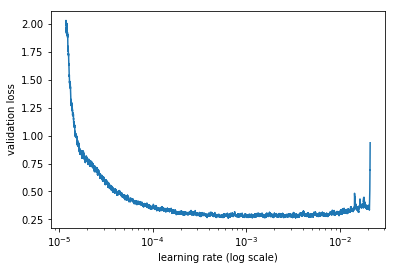

In [48]:
m.sched.plot(1000)

In [49]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0, 1, [500, 100], [0,0], y_range=y_range)
m.lr_find()

 61%|██████    | 50246/82615 [03:56<02:32, 212.47it/s, loss=0.972]

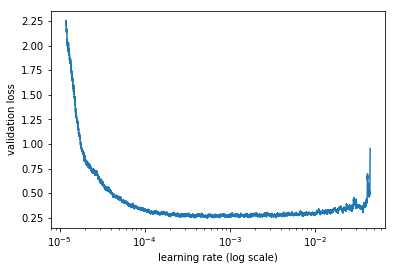

In [60]:
m.sched.plot(1000)

In [61]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0, 1, [500, 100], [0,0], y_range=y_range)
lr = 5e-3
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.239502   0.638693   2.466827  
    1      0.237217   0.589674   2.904225                         
    2      0.239414   0.635423   2.37249                          


[array([0.63542]), 2.3724902238110253]

In [62]:
x,y=m.predict_with_targs()

In [63]:
exp_rmspe(x,y)

9.523602528820337

In [78]:
def rmspe(y_pred, targ):
    pct_var = (targ - y_pred)/targ
    return math.sqrt((pct_var**2).mean())


rmspe(inv_y(x), inv_y(y))

9.523602528820337

In [82]:
inv_y(x) - 1

array([[0.02498],
       [0.00002],
       [0.00002],
       [0.     ],
       [0.00001],
       [0.     ],
       [0.02285],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.01804],
       [0.     ],
       [0.     ],
       ...,
       [8.44272],
       [8.69752],
       [8.03418],
       [9.27041],
       [8.46269],
       [7.60341],
       [7.8583 ],
       [7.59868],
       [7.71351],
       [6.24384],
       [6.80838],
       [6.04933],
       [3.66849],
       [4.04286],
       [3.60013],
       [2.56258],
       [2.66908],
       [1.72105],
       [1.28049],
       [1.26233]], dtype=float32)

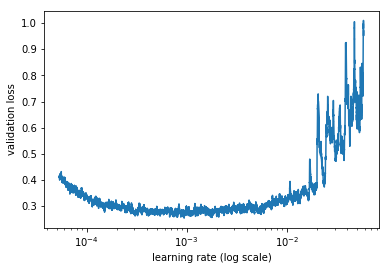

In [36]:
m.sched.plot(10000)

In [37]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.05,0.5], y_range=y_range)
lr = 1e-4

In [38]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.233032   0.598565   2.657202  
  6%|▌         | 5018/82615 [00:24<06:16, 206.36it/s, loss=0.232]

KeyboardInterrupt: 

====================================================
model 2
=============================

In [30]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0, 1, [1000,500], [0.5,0.5], y_range=y_range)

In [31]:
lr = 1e-10
m.lr_find()

 51%|█████▏    | 42359/82615 [12:52<12:14, 54.83it/s, loss=1.12] 

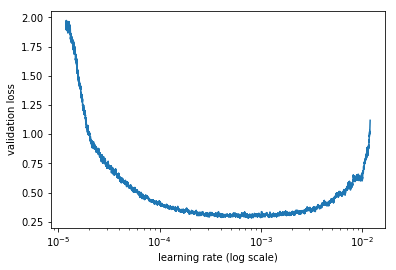

In [33]:
m.sched.plot(1000)

In [40]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                  0.04, 1, [1000,500], [0,0], y_range=y_range)
lr = 0.00003
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.264578   0.613583   2.74614   
  4%|▍         | 3138/82615 [00:49<21:02, 62.97it/s, loss=0.26] 

KeyboardInterrupt: 

======================================================
======================================================
======================================================
======================================================

Garbage below


In [140]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128)

In [141]:
cat_sz = [(c, len(sorted_samp[c].cat.categories)+1) for c in cat_vars]

In [142]:
cat_sz

[('parkingFacilityId', 177),
 ('parkingFacilityZoneId', 67),
 ('articleId', 325),
 ('timeYear', 2),
 ('timeMonth', 8),
 ('timeWeek', 28),
 ('timeDay', 32),
 ('timeDayofweek', 8),
 ('timeDayofyear', 185),
 ('timeIs_month_end', 3),
 ('timeIs_month_start', 3),
 ('timeIs_quarter_end', 3),
 ('timeIs_quarter_start', 3),
 ('timeIs_year_end', 2),
 ('timeIs_year_start', 2)]

In [143]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [144]:
emb_szs

[(177, 50),
 (67, 34),
 (325, 50),
 (2, 1),
 (8, 4),
 (28, 14),
 (32, 16),
 (8, 4),
 (185, 50),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (2, 1),
 (2, 1)]

In [145]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [146]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [147]:
lr = 1e-3
m.lr_find()

epoch      trn_loss   val_loss       
    0      1.854111   7.242373  


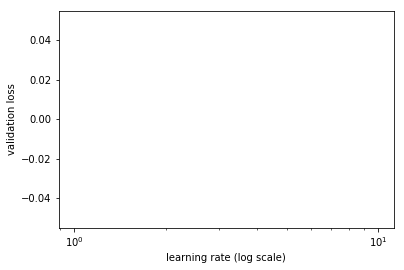

In [148]:
m.sched.plot(100)

In [159]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-6

In [160]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      1.677433   1.85796    3.279232  
    1      1.680346   1.857447   3.288413  
    2      1.69453    1.856952   3.297385  


[array([1.85695]), 3.2973847122913695]